# A/B Testing For an E-Commerce Website Landing Page

A/B testing means to analyse two marketing strategies in order to choose the best one that can convert more traffic into sales (or a desired goal) effectively and efficiently.

A/B testing helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers.

## The Project:
In this project, I will be performing an A/B test for a website landing page of an E-Commerce company and try to understand the results obtained from it. The company performed two different campaigns:
- Control Campaign
- Test Campaign

The goal is to help the company decide if they should implement the new landing page or stick to the old one in order to get more customers.

The datasets used has been collected from <a href="www.kaggle.com" target="_blank">Kaggle</a> and has been submitted by İlker Yıldız. Please note that the use case of the dataset has been changed from its original for the purpose of this project.

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
Data Wrangling is a crucial step in any Data Analysis project as it helps in removing errors from the dataset through data cleansing, and combining complex datasets to make them more accessible and easier to analyse.

### Importing the Datasets
Let's import both the `control` and `test` data, and take a look at them.

In [2]:
control_data = pd.read_csv('Dataset/control_group.csv', sep = ';')
control_data

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [3]:
test_data = pd.read_csv('Dataset/test_group.csv', sep = ';')
test_data

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


### Assessing the Datasets
Next, let's find out the shapes of the two datasets to see if they match to eliminate any need for data manipulation.

In [4]:
print(f'Control Data Shape: {control_data.shape}\nTest Data Shape: {test_data.shape}')

Control Data Shape: (30, 10)
Test Data Shape: (30, 10)


As we can see, the number of observations for both the campaign are equal in number, so ther would not be any biasness towards a specific campaign. Also, the number of factors these campaigns had been evaluated are equal as well, removing any discrepancies while comparing the two.

Next, I shall look at the basic info of the two datasets to look at errors in dataset structures, data types, and to look for potential missing values.

In [5]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


We can see that the control dataset has null values in it as the number of non-null rows in each column of the dataset does not match. Also, the data types for all the columns do not match in both the datasets. Hence, these need to be addressed.

### Fixing Column Names
But before that, I need to change the column names of both the datasets to avoid errors raised due to the symbols being used in the column names.

In [7]:
column_names = ['campaign', 'date', 'spend_usd', 'impressions', 'reach', 'website_clicks', 'searches', 'view_content', 'add_to_cart', 'purchase']

In [8]:
control_data.columns = column_names
test_data.columns = column_names

In [9]:
control_data.head()

,campaign,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
test_data.head()

,campaign,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


The column names have been fixed according to my preference.

### Removing Duplicates
Duplicate values not only ruins data splits leading to biased performance estimates that result in disappointing models in production, but also affects the insights drawn from data mining due to data inaccuracy. As a result, we should remove any duplicates from the datasets.

In [11]:
control_data.duplicated().sum()

0

In [12]:
test_data.duplicated().sum()

0

Great!! There are no duplicates in the dataset. So that is one less thing to worry about.

### Fixing Missing Values
Previously we had seen that the control dataset contains null values in multiple columns. These data need to be fixed before proceeding with my data analysis.

In [13]:
# check the columns with null values
control_data.isnull().sum()

campaign          0
date              0
spend_usd         0
impressions       1
reach             1
website_clicks    1
searches          1
view_content      1
add_to_cart       1
purchase          1
dtype: int64

All columns except `campaign`, `date`, and `spend_usd` contain null values.

In [14]:
# fill null values with mean of each column
null_columns = ['impressions', 'reach', 'website_clicks', 'searches', 'view_content', 'add_to_cart', 'purchase']

for col in null_columns:
    control_data[col].fillna(value = control_data[col].mean(), inplace = True)

In [15]:
control_data.isnull().sum()

campaign          0
date              0
spend_usd         0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
add_to_cart       0
purchase          0
dtype: int64

As we can see, I was able to successfully fill all the null values with the mean value of each null column.

### Merging the Datasets
Next, I will be merging the two datasets into a new DataFrame so that all the necessary information is in one place for ease of analysis. The method used will be 'full outer join' to make sure the final dataset has all the data of both the datasets regardless of matching columns.

I will also be sorting the rows based on the date column in ascending order, and will also be resetting the index to remove index mismatches.

In [16]:
# full outer join
merged_data = control_data.merge(test_data, how = 'outer')
merged_data

/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_62916/972569313.py:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_data = control_data.merge(test_data, how = 'outer')


,campaign,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103
5,Control Campaign,6.08.2019,3083,109076.000000,87998.000000,4028.000000,1709.000000,1249.000000,784.0,764.000000
6,Control Campaign,7.08.2019,2544,142123.000000,127852.000000,2640.000000,1388.000000,1106.000000,1166.0,499.000000
7,Control Campaign,8.08.2019,1900,90939.000000,65217.000000,7260.000000,3047.000000,2746.000000,930.0,462.000000
8,Control Campaign,9.08.2019,2813,121332.000000,94896.000000,6198.000000,2487.000000,2179.000000,645.0,501.000000
9,Control Campaign,10.08.2019,2149,117624.000000,91257.000000,2277.000000,2475.000000,1984.000000,1629.0,734.000000


In [17]:
# check inferred data types
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign        60 non-null     object 
 1   date            60 non-null     object 
 2   spend_usd       60 non-null     int64  
 3   impressions     60 non-null     float64
 4   reach           60 non-null     float64
 5   website_clicks  60 non-null     float64
 6   searches        60 non-null     float64
 7   view_content    60 non-null     float64
 8   add_to_cart     60 non-null     float64
 9   purchase        60 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 5.2+ KB


We can see that the `date` column in the merged dataset has been inferred as an object. We should change it to a proper datetime format for accurate analysis down the road.

In [18]:
# convert date column to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'], dayfirst = True)
merged_data

,campaign,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,2019-08-01,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,2019-08-02,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,2019-08-03,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,2019-08-04,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,2019-08-05,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103
5,Control Campaign,2019-08-06,3083,109076.000000,87998.000000,4028.000000,1709.000000,1249.000000,784.0,764.000000
6,Control Campaign,2019-08-07,2544,142123.000000,127852.000000,2640.000000,1388.000000,1106.000000,1166.0,499.000000
7,Control Campaign,2019-08-08,1900,90939.000000,65217.000000,7260.000000,3047.000000,2746.000000,930.0,462.000000
8,Control Campaign,2019-08-09,2813,121332.000000,94896.000000,6198.000000,2487.000000,2179.000000,645.0,501.000000
9,Control Campaign,2019-08-10,2149,117624.000000,91257.000000,2277.000000,2475.000000,1984.000000,1629.0,734.000000


In [19]:
# sort by date
merged_data = merged_data.sort_values(by = ['date'])

In [20]:
# reset index
merged_data = merged_data.reset_index(drop = True)

In [21]:
merged_data

,campaign,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,2019-08-01,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Test Campaign,2019-08-01,3008,39550.000000,35820.000000,3038.000000,1946.000000,1069.000000,894.0,255.000000
2,Control Campaign,2019-08-02,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
3,Test Campaign,2019-08-02,2542,100719.000000,91236.000000,4657.000000,2359.000000,1548.000000,879.0,677.000000
4,Control Campaign,2019-08-03,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
5,Test Campaign,2019-08-03,2365,70263.000000,45198.000000,7885.000000,2572.000000,2367.000000,1268.0,578.000000
6,Control Campaign,2019-08-04,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
7,Test Campaign,2019-08-04,2710,78451.000000,25937.000000,4216.000000,2216.000000,1437.000000,566.0,340.000000
8,Control Campaign,2019-08-05,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103
9,Test Campaign,2019-08-05,2297,114295.000000,95138.000000,5863.000000,2106.000000,858.000000,956.0,768.000000


The data merge has been successful, with the `date` column turned into datetime type, the values sorted by the `date` column, and the index reset to make the data sequential.

And with that, I am done with the Data Wrangling phase and can proceed to EDA.

## Exploratory Data Analysis (EDA)
EDA is one of the most important steps in a Data Analysis project as it can help to:
- maximise insight into a dataset
- uncover underlying structures
- detect outliers and anomalies
- extract important features etc.

Hence, EDA can help in having an overall understanding of the trends, patterns and relationships in the datasets that are not readily apparent, allowing data analysts to analyse the data before coming to any assumption.

### Observation per Campaign
Let us first check the no. of observations there are for each of the campaign types to prepare for any biasness in the data in terms of campaign type.

In [22]:
merged_data.groupby(['campaign'])['campaign'].count()

campaign
Control Campaign    30
Test Campaign       30
Name: campaign, dtype: int64

We can see that the two campaigns have equal number of observations. It tells us that if we do an A/B testing based on it, there will be no bias in one campaign over another. However, this can be deceptive.

What we should really be checking is the number of unique individual views (or `reach` in this project) for each campaign.

### Reach per Campaign
As stated earlier, we need to check the reach of each campaign to see if they vary greatly between the campaigns, to indicate potential biasness.

In [23]:
# calculate reach per campaign
reach_per_campaign = merged_data.groupby(['campaign'])['reach'].sum()
reach_per_campaign

campaign
Control Campaign    2.665348e+06
Test Campaign       1.604747e+06
Name: reach, dtype: float64

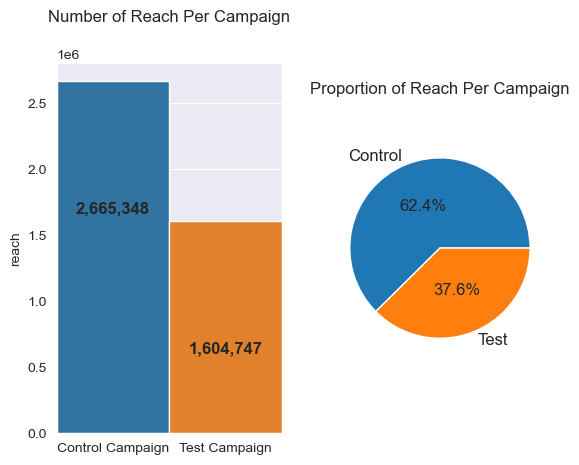

In [24]:
# plot the output
plt.subplot(1,2,1)
sns.barplot(x=reach_per_campaign.index, y=reach_per_campaign, width=1.00)

for i, val in enumerate(reach_per_campaign):
    plt.text(i, val - 1000000, "{:0,.0f}".format(val), fontsize=12, fontweight="bold", ha="center")

plt.xlabel('')
plt.title('Number of Reach Per Campaign', pad=30)

plt.subplot(1,2,2)
plt.pie(x=reach_per_campaign, autopct='%1.1f%%', textprops={'fontsize': 12}, labels=['Control', 'Test'], pctdistance=0.5)
plt.title('Proportion of Reach Per Campaign', pad=30)
plt.show()

It can now be seen that the number and proportion of reach in the control dataset is more than 1.5 times that in the test dataset. This is very likely to result in a bias while performing the A/B test.

### Click Through Rate (CTR)
One of the most useful metrics when analysing website traffic is the click through rate (or CTR), which basically calculates the average time a unique individual clicks on a link in the website. Hence, it will tell us what percentage of the total traffic is actually interacting with the site instead of just viewing it, showing the interest of the users on the site.

Thus, let's visualise the CTR for each campaign.

In [25]:
# calculate ctr per campaign
ctr = merged_data.groupby(['campaign'])['website_clicks'].sum() / merged_data.groupby(['campaign'])['reach'].sum() * 100
ctr

campaign
Control Campaign     5.988854
Test Campaign       11.277167
dtype: float64

Text(0.5, 1.0, 'CTR Per Campaign')

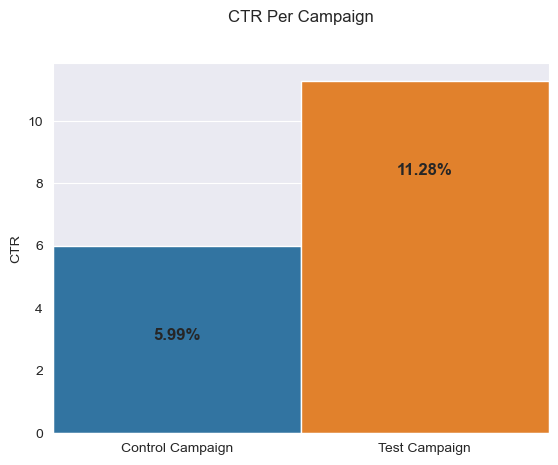

In [26]:
# plot the output
sns.barplot(x=ctr.index, y=ctr, width=1.00)

for i, val in enumerate(ctr):
    plt.text(i, val - 3, "{:.2f}%".format(val), fontsize=12, fontweight="bold", ha="center")

plt.xlabel('')
plt.ylabel('CTR')
plt.title('CTR Per Campaign', pad=30)

The above output shows an interesting insight of the dataset. Although previously, we had seen that the reach of the control campaign was significantly more than the test campaign, the click-through-rate of the latter is almost twice as much as the former campaign. It goes on to show that the conversion rate (in terms of website clicks) of the test campaign is much higher than the control campaign, although it fails to draw as many unique viewers.

### Summary Statistics
To get an overall picture of each of the feature variables, let us create a summary statistics for the two campaigns. For this, I will be creating separate box plots for each of the columns which will not only give us the quartiles and extreme bounds, but will also allow us to compare the spread of the data for each campaign.

Text(0.5, 1.02, 'Summary Statistics for Each Column per Campaign')

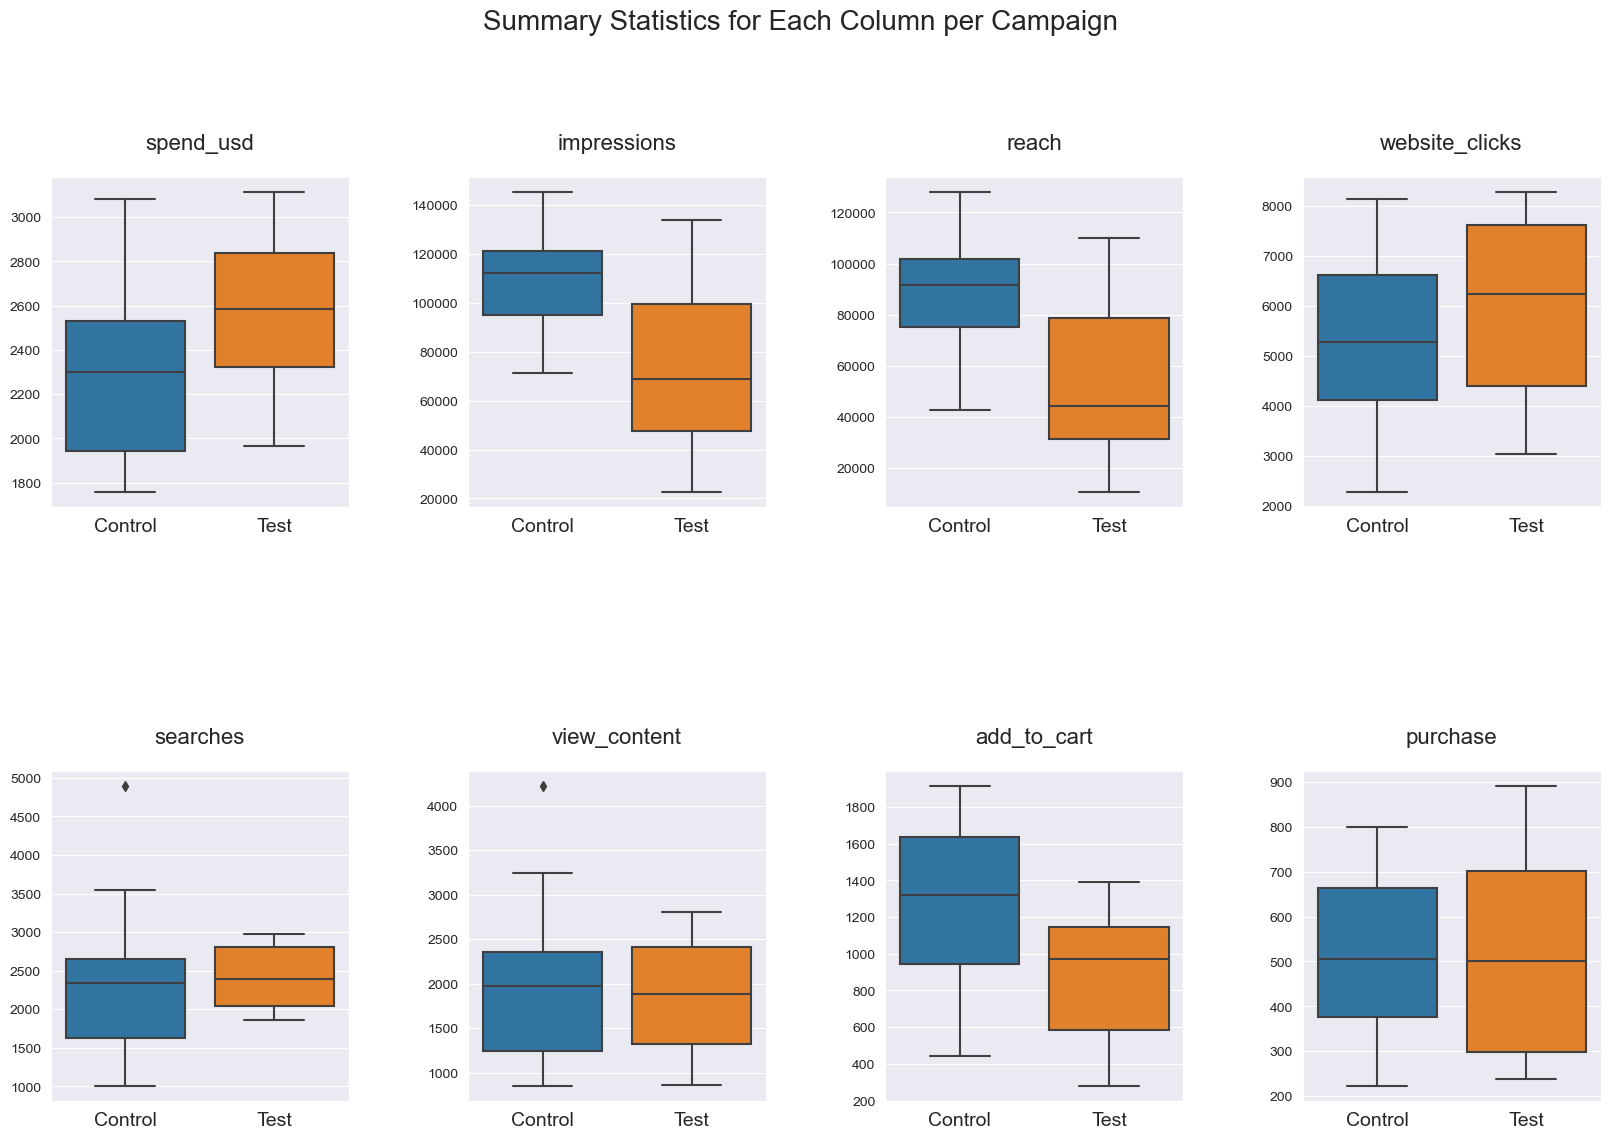

In [31]:
fig, ax = plt.subplots(2, 4, figsize=(20,12))

cols = merged_data.columns.values[2:]

row, column = 0, 0

for col in cols:
    sns.boxplot(data=merged_data, x='campaign', y=col, ax=ax[row, column])
    ax[row, column].set_title(col, pad=20, fontsize=16)
    ax[row,column].set_xlabel('')
    ax[row,column].set_ylabel('')
    ax[row, column].set_xticklabels(labels=['Control', 'Test'], fontsize=14)

    # reset column and go to next row
    if column == 3:
        row+=1
        column=-1

    column+=1

plt.subplots_adjust(hspace=0.8, wspace=0.4)
plt.suptitle('Summary Statistics for Each Column per Campaign', y=1.02, fontsize=20)

**Explanation:**

- spend_usd: It can be seen that the minimum amount of spending in the test campaign is greater than that of the control campaign. Same goes for the upper bound although to a much lesser extent. What is more interesting is that the control data is positively skewed meaning that more people tend to spend less here. It is more exaggerated by the fact that the median spend of the test campaign is more than the upper quartile of the control.

- impressions: For this metric, we can see that the box plot of the control campaign is much higher and also narrower than that of the test campaign. This suggests that the control campaign saw a higher impression overall compared to its counterpart and also it is less spreaded.

- reach: Similar to impressions, we can see that the minimum of unique observations in the control campaign is significantly greater than the minimum in the test, being close to the median of the latter. Also, the maximum reach of the control is also greater than test by about 10%.

- website_clicks: Here we have an opposite scenario to the above observation, as the minimum number of clicks in the control group is smaller than the minimum in the test group by a difference of about 10%. Moreover, the median and upper bound of the test group is also more than that of the control, explaining why its CTR was greater.

- searches: Although the minimum number of searches for the test group is greater than the 25% level of the number of research for the control, we find that the total spread of data for the control is much greater than the test. Also, note that there is an outlier beyond the upper bound in the control.

- view_content: We find that the minimum and the first, second and third quartile levels of the view content numbers for both groups are very close, but the maximum for the control group was greater than the test with a difference of about 10%.

- add_to_cart: We can see that the minimum number of people who added to cart in the control group is greater than the minimum in the test, and that the median value for the control is almost same as the maximum in test. Furthermore, the test data is positively skewed meaning that more people add fewer items in their carts.

- purchase: Here the opposite happened a little. Although the minimum and median number of purchases in the two groups are almost close, 25% of the maximum number of purchases in the control group is greater than 25% in the test group. Also, the data for the test group is more spreaded meaning that people make a wider range of number of purchases in here.